In [56]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [13]:
r = 0.008
sigma = 0.2
s_t = 100
T = 30
K = 100
T_0 = 0
t = 0

kemna vorst p 11

In [32]:
def kemna_vorst(s_t=100, K=100, r=0.008, sigma=0.2, T=30, T_0=0):
    d_star = (1/2)*(r-(sigma**2) / 6)*(T-T_0)
    d = (np.log(s_t/K) + (1/2)*(r - (sigma**2) / 6)*(T-T_0))/(sigma*np.sqrt((T-T_0)/3))
    C_val = np.exp(d_star)*s_t*norm.cdf(d) - K*norm.cdf(d-sigma*np.sqrt((T-T_0)/3))
    return C_val

In [33]:
kemna_vorst()

24.899334865127113

mainfile p 70, continuous fixed strike geometric average call option

In [34]:
def geometric_mkhize_general(s_t=100, K=100, r=0.008, sigma=0.2, T=30, T_0=0, t=0):
    s_wave_t = s_t ** ((T-t)/(T-T_0))
    d1 = ((T-T_0) * np.log(s_wave_t/K) + 0.5 * (r - 0.5 * sigma**2) * (T-t)**2 + (sigma**2 * (T-t)**3)/(3*(T-T_0)))/(sigma * np.sqrt(((T-t)**3)/3))
    d2 = ((T-T_0) * np.log(s_wave_t/K) + 0.5 * (r - 0.5 * sigma**2) * (T-t)**2)/(sigma * np.sqrt(((T-t)**3)/3))
    C_G = np.exp(-r*(T-t)) * (s_t * np.exp(((r-0.5*sigma**2)*((T-t)**2))/(2*(T-T_0)) + (sigma**2*((T-t)**3))/(6*(T-T_0)**2))*norm.cdf(d1) - K*norm.cdf(d2))
    P_G = np.exp(-r*(T-t)) * (K*norm.cdf(-d2) - s_t * np.exp((r-0.5*sigma**2)*((T-t)**2)/(2*(T-T_0)) + (sigma**2*(T-t)**3)/(6*(T-T_0)**2))*norm.cdf(-d1))
    return C_G, P_G

In [35]:
geometric_mkhize_general()

(20.523036238760817, 18.933942549168304)

In [36]:
# s_wave_t = s_t ** ((T-t)/(T-T_0))

In [37]:
# d1 = ((T-T_0) * np.log(s_wave_t/K) + 0.5 * (r - 0.5 * sigma**2) * (T-t)**2 + (sigma**2 * (T-t)**3)/(3*(T-T_0)))/(sigma * np.sqrt(((T-t)**3)/3))
# 
# d2 = ((T-T_0) * np.log(s_wave_t/K) + 0.5 * (r - 0.5 * sigma**2) * (T-t)**2)/(sigma * np.sqrt(((T-t)**3)/3))

In [38]:
# C_G = np.exp(-r*(T-t)) * (s_t * np.exp(((r-0.5*sigma**2)*((T-t)**2))/(2*(T-T_0)) + (sigma**2*((T-t)**3))/(6*(T-T_0)**2))*norm.cdf(d1) - K*norm.cdf(d2))

In [39]:
# C_G

In [40]:
# P_G = np.exp(-r*(T-t)) * (K*norm.cdf(-d2) - s_t * np.exp((r-0.5*sigma**2)*((T-t)**2)/(2*(T-T_0)) + (sigma**2*(T-t)**3)/(6*(T-T_0)**2))*norm.cdf(-d1))

In [41]:
# P_G

mainfile p 69, continuous fixed strike geometric average call option, at t = T_0, should be the same as the previous one

In [42]:
def geometric_mkhize(s_t=100, K=100, r=0.008, sigma=0.2, T=30, T_0=0):
    d_1 = (np.log(s_t/K) + 0.5*(r + (sigma**2)/6)*(T-T_0))/(sigma*np.sqrt((T-T_0)/3))
    d_2 = d_1 - sigma*np.sqrt((T-T_0)/3)
    tau = T - T_0
    C_0 = s_t* np.exp(-0.5 * (r + (sigma**2)/6)*(T-T_0))*norm.cdf(d_1) - K*np.exp(-r*(T-T_0))*norm.cdf(d_2)
    P_0 = K*np.exp(-r*(T-T_0))*norm.cdf(-d_2) - s_t*np.exp(-0.5*(r + (sigma**2)/6)*(T-T_0))*norm.cdf(-d_1)
    return C_0, P_0

In [43]:
geometric_mkhize()

(20.52303623876081, 18.93394254916831)

In [46]:
geometric_mkhize()[0]

20.52303623876081

In [47]:
geometric_mkhize_general(t=0)[0]

20.523036238760817

In [49]:
assert np.allclose(geometric_mkhize(), geometric_mkhize_general(t=0), rtol=1e-5)

Kemna Vorst p 12, asian is allways cheaper or equal to european

In [53]:
def european_option(s_t=100, K=100, r=0.008, sigma=0.2, T=30):
    d_1 = (np.log(s_t/K) + (r + 0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d_2 = d_1 - sigma*np.sqrt(T)
    C_0 = s_t*norm.cdf(d_1) - K*np.exp(-r*T)*norm.cdf(d_2)
    P_0 = K*np.exp(-r*T)*norm.cdf(-d_2) - s_t*norm.cdf(-d_1)
    return C_0, P_0

In [54]:
european_option()

(48.63941024359666, 27.302196350252007)

In [55]:
assert np.all(european_option() >= geometric_mkhize())

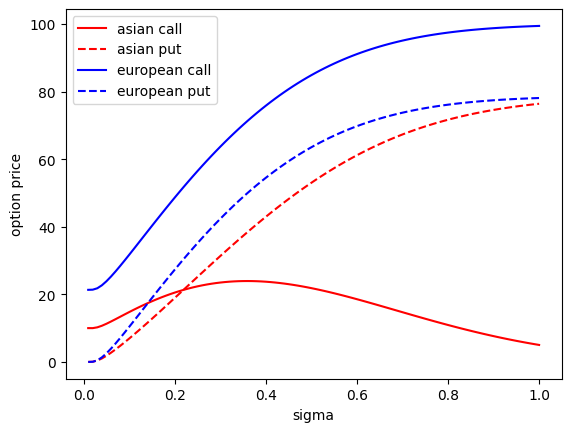

In [60]:
sigmas = np.linspace(0.01, 1, 100)
# r = np.linspace(0, 0.05, 100)
r = 0.008
asian_call = []
european_call = []
asian_put = []
european_put = []
for sigma in sigmas:
    asian_call.append(geometric_mkhize(sigma=sigma)[0])
    european_call.append(european_option(sigma=sigma)[0])
    asian_put.append(geometric_mkhize(sigma=sigma)[1])
    european_put.append(european_option(sigma=sigma)[1])

plt.plot(sigmas, asian_call, label='asian call', color='red')
plt.plot(sigmas, asian_put, label='asian put', color='red', linestyle='--')
plt.plot(sigmas, european_call, label='european call', color='blue')
plt.plot(sigmas, european_put, label='european put', color='blue', linestyle='--')
plt.legend()
plt.xlabel('sigma')
plt.ylabel('option price')
plt.show()

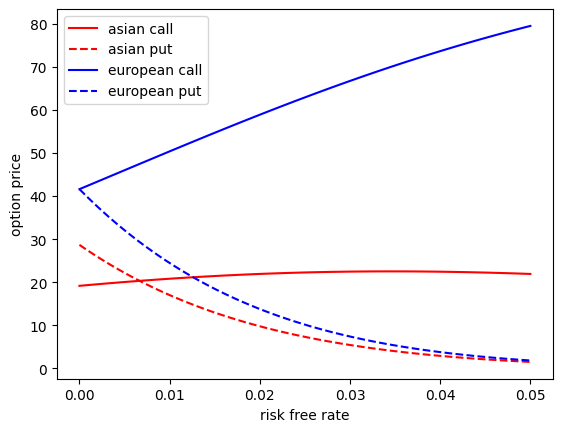

In [62]:
sigma = 0.2
rates = np.linspace(0, 0.05, 100)
asian_call = []
european_call = []
asian_put = []
european_put = []
for r in rates:
    asian_call.append(geometric_mkhize(r=r)[0])
    european_call.append(european_option(r=r)[0])
    asian_put.append(geometric_mkhize(r=r)[1])
    european_put.append(european_option(r=r)[1])

plt.plot(rates, asian_call, label='asian call', color='red')
plt.plot(rates, asian_put, label='asian put', color='red', linestyle='--')
plt.plot(rates, european_call, label='european call', color='blue')
plt.plot(rates, european_put, label='european put', color='blue', linestyle='--')
plt.legend()
plt.xlabel('risk free rate')
plt.ylabel('option price')
plt.show()